In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

In [999]:
shots = pd.read_csv('.data/shots.csv')
shots.loc[:, 'freeze_frame'] = shots.loc[:, 'freeze_frame'].apply(ast.literal_eval)
shots.loc[:, 'gk_loc'] = shots.loc[:, 'gk_loc'].apply(ast.literal_eval)
shots.loc[:, 'end_loc'] = shots.loc[:, 'end_loc'].apply(ast.literal_eval)
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,...,type,technique,body_part,outcome,end_loc,freeze_frame,gk_loc,gk_loc_x,gk_loc_y,distance_to_gk
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,...,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]",119.6,42.3,28.94
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,...,Open Play,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]",118.8,43.2,16.87
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,...,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]",118.2,36.8,11.88
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,...,Open Play,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]",119.3,39.0,6.26
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,...,Open Play,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]",118.5,40.0,23.30


In [1000]:
shots = shots.rename(columns = {'outcome': 'outcome_type'})
shots.loc[:, 'outcome'] = shots.loc[:, 'outcome_type'].apply(lambda x: 1 if x == 'Goal' else 0)
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,...,technique,body_part,outcome_type,end_loc,freeze_frame,gk_loc,gk_loc_x,gk_loc_y,distance_to_gk,outcome
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,...,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]",119.6,42.3,28.94,0
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,...,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]",118.8,43.2,16.87,0
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,...,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]",118.2,36.8,11.88,0
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,...,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]",119.3,39.0,6.26,0
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,...,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]",118.5,40.0,23.30,0


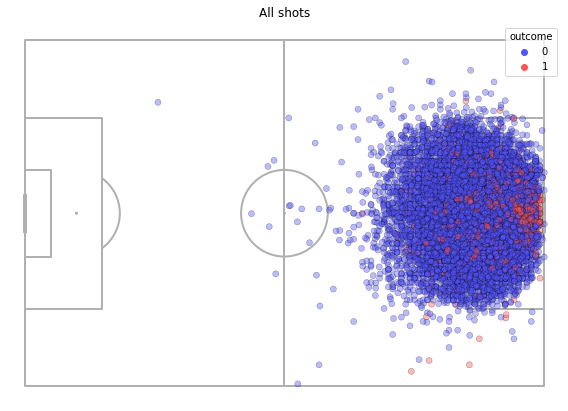

In [1001]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = shots, x = 'x_start', y = 'y_start', ax = ax,
                hue = 'outcome', palette = 'seismic', edgecolor = 'black', alpha = 0.4)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [1002]:
shots.loc[:, 'type'].unique()

array(['Open Play'], dtype=object)

In [1004]:
# only leave 'Open Play' shots (that are not directly from Free Kick, Corner, Penalty, Kick Off)
shots = shots.loc[shots.loc[:, 'type'] == 'Open Play', :]

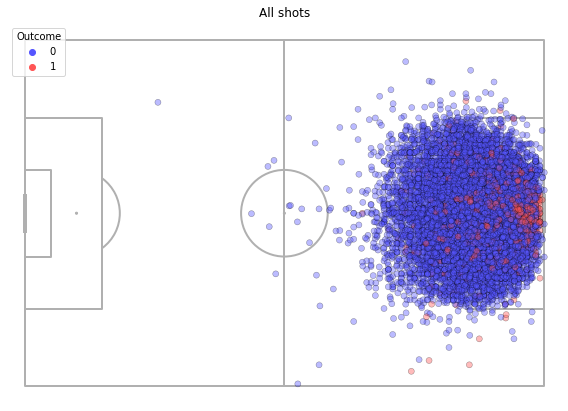

In [1005]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = shots, x = 'x_start', y = 'y_start', ax = ax,
                hue = 'outcome', palette = 'seismic', edgecolor = 'black', alpha = 0.4)



#hexmap = pitch.hexbin(shots.x_start, shots.y_start, ax=ax, edgecolors='#f4f4f4', cmap='summer', gridsize = 50)

ax.legend(title = 'Outcome', frameon = True, loc = 'upper left')
ax.set_title('All shots')
plt.show()

**Adding distance and angle features**

In [1006]:
# Distance Feature calculation

# define goal center for 'statsbomb'
goal_center = np.array([120, 40])

# calculate distance between shot and goal center
shots['distance'] = np.sqrt((shots['x_start'] - goal_center[0])**2 + (shots['y_start'] - goal_center[1])**2)
shots['distance'] = shots['distance'].round(decimals = 2)

In [1007]:
# Angle Feature calculation

# transform x, y coordinates from percentiles to field length coordinates (105 meters x 68 meters)
x = shots['x_start'] * 105/120
y = shots['y_start'] * 68/80 

# Use trigonometric formula to find angle between two sides (a,b ) of triangle where third side (c) 
# is a goal line of length 7.32
a = np.sqrt((x - 105)**2 + (y - 30.34)**2) # length between right post and (x,y) shot coordinate
b = np.sqrt((x - 105)**2 + (y - 37.66)**2) # length between left post and (x,y) shot coordinate
c = 7.32 # goal line length
cos_alpha = (a**2 + b**2 - c**2)/(2*a*b)
cos_alpha = np.round(cos_alpha, decimals = 4)

# remember to leave angle in radians (if you want to transfer to degree multiply cos_alpha by 180/pi)
shots['angle'] = np.arccos(cos_alpha)

In [1008]:
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,...,outcome_type,end_loc,freeze_frame,gk_loc,gk_loc_x,gk_loc_y,distance_to_gk,outcome,distance,angle
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,...,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]",119.6,42.3,28.94,0,30.63,0.220446
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,...,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]",118.8,43.2,16.87,0,19.94,0.305489
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,...,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]",118.2,36.8,11.88,0,15.47,0.372831
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,...,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]",119.3,39.0,6.26,0,6.81,1.100781
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,...,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]",118.5,40.0,23.30,0,24.80,0.334118


In [1009]:
shots.loc[:, 'gk_loc_x'] = shots.loc[:, 'gk_loc'].apply(lambda x: x[0])
shots.loc[:, 'gk_loc_y'] = shots.loc[:, 'gk_loc'].apply(lambda x: x[1])

In [1010]:
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,...,outcome_type,end_loc,freeze_frame,gk_loc,gk_loc_x,gk_loc_y,distance_to_gk,outcome,distance,angle
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,...,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]",119.6,42.3,28.94,0,30.63,0.220446
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,...,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]",118.8,43.2,16.87,0,19.94,0.305489
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,...,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]",118.2,36.8,11.88,0,15.47,0.372831
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,...,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]",119.3,39.0,6.26,0,6.81,1.100781
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,...,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]",118.5,40.0,23.30,0,24.80,0.334118


**Transforming and Splitting Data**

In [1282]:
from sklearn.model_selection import train_test_split
# Prepare features and labels from available data
X = shots.loc[:, ['play_pattern_name','under_pressure', 'distance', 'angle', 'gk_loc_x', 'gk_loc_y',
                   'follows_dribble', 'first_time', 'open_goal', 'technique', 'body_part']]
y = shots.loc[:, 'outcome']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [1283]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

column_trans = ColumnTransformer(
    [('encode_bodyparts', OneHotEncoder(dtype='int'), ['play_pattern_name', 'technique', 'body_part']),
    ('std_coords', StandardScaler(), ['distance', 'angle', 'gk_loc_x', 'gk_loc_y'])],
    remainder = 'passthrough', verbose_feature_names_out = True)

X_train_trans = column_trans.fit_transform(X_train)

**Logistic Regression**

In [1230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, brier_score_loss

# Fit Logistic Regression Model
xG_model = LogisticRegression()
xG_model.fit(X_train_trans, y_train)

# evaluate
xG_predictions = xG_model.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.7892058620135882

In [1231]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = xG_model.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.7895546665494351

In [1185]:
brier_score_loss(y_valid, xG_predictions)

0.07828578422035744

**Gradient Boosting | Best Performer**

In [1276]:
# features used:
# X = shots.loc[:, ['play_pattern_name','under_pressure', 'distance', 'angle', 'gk_loc_x', 'gk_loc_y',
#                   'follows_dribble', 'first_time', 'open_goal', 'technique', 'body_part']]

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.035, loss = 'exponential',
    random_state=0).fit(X_train_trans, y_train)

xG_predictions = clf.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.8495895973238681

In [1277]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = clf.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.8068668395832417

In [1278]:
brier_score_loss(y_valid, xG_predictions)

0.07687585376539659

**MLP**

In [1134]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, activation = 'relu', hidden_layer_sizes = (40, 40, 40, 40, 40), alpha = 0.001, 
                    learning_rate = 'adaptive', 
                    max_iter=300).fit(X_train_trans, y_train)

xG_predictions = clf.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.9579618228417295

In [1135]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = clf.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.657378995032312

In [1136]:
brier_score_loss(y_valid, xG_predictions)

0.1233248558678138

**Testing `distance_to_goalkeeper` feature**

In [1210]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.0355, loss = 'exponential',
    random_state=0).fit(X_train_trans, y_train)

xG_predictions = clf.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.8488767560203682

In [1211]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = clf.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.8001538664439266

In [1212]:
brier_score_loss(y_valid, xG_predictions)

0.07755141450799768

**Random Forrest**

In [1454]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth = 10, random_state = 12, criterion = 'entropy')
clf = RandomForestClassifier(max_depth = 10, random_state = 12, criterion = 'entropy', max_samples = 0.5)
clf.fit(X_train_trans, y_train)

xG_predictions = clf.predict_proba(X_train_trans)[:, 1]
roc_auc_score(y_train, xG_predictions)

0.896222733137343

In [1455]:
X_valid_trans = column_trans.transform(X_valid)
xG_predictions = clf.predict_proba(X_valid_trans)[:, 1]
roc_auc_score(y_valid, xG_predictions)

0.8052754209346287

In [1449]:
brier_score_loss(y_valid, xG_predictions)

0.0768273276203816

## Statsmodels

In [1169]:
df_train = pd.concat([X_train, y_train], axis = 1).reset_index(drop = True)
df_train.head()

,play_pattern_name,under_pressure,distance,angle,gk_loc_x,gk_loc_y,distance_to_gk,follows_dribble,first_time,open_goal,technique,body_part,outcome
0,Regular Play,0,20.10,0.261513,117.5,36.8,16.04,0,0,0,Normal,Right Foot,0
1,From Corner,1,9.11,0.388707,118.9,43.0,5.91,0,0,0,Normal,Head,0
2,Regular Play,0,26.23,0.264971,118.4,37.5,23.49,0,0,0,Normal,Right Foot,0
3,From Throw In,1,25.09,0.259182,118.8,37.3,22.44,0,0,0,Normal,Right Foot,0
4,Regular Play,0,17.80,0.380713,118.0,41.0,15.62,0,0,0,Normal,Left Foot,0


In [1172]:
import statsmodels.formula.api as smf

# run model
logreg_model = smf.logit(
    formula = "outcome ~ distance + angle + under_pressure + gk_loc_y + gk_loc_x + \
    body_part + open_goal + play_pattern_name",
                         data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.284804
         Iterations 8


In [1173]:
logreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 8834
Model:                          Logit   Df Residuals:                     8816
Method:                           MLE   Df Model:                           17
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1512
Time:                        20:54:56   Log-Likelihood:                -2516.0
converged:                       True   LL-Null:                       -2964.3
Covariance Type:            nonrobust   LLR p-value:                1.124e-179
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              13.0536      1.797      7.264      0.000       9.532      16.575
body_part[T.Left Foot]                  0.5300      0.122      4.329      0.000       0.290       0.770
body_part[T.Other]                     -0.5009      0.601     -0.833      0.405      -1.680       0.678
body_part[T.Right Foot]                 0.4744      0.113      4.187      0.000       0.252       0.696
play_pattern_name[T.From Counter]       0.6144      0.185      3.327      0.001       0.253       0.976
play_pattern_name[T.From Free Kick]     0.5234      0.139      3.769      0.000       0.251       0.796
play_pattern_name[T.From Goal Kick]     0.8839      0.207      4.279      0.000       0.479       1.289
play_pattern_name[T.From Keeper]        0.3934      0.352      1.118      0.264      -0.296       1.083
play_pattern_name[T.From Kick Off]      0.2545      0.447      0.569      0.569      -0.622       1.131
play_pattern_name[T.From Throw In]      0.4644      0.132      3.525      0.000       0.206       0.723
play_pattern_name[T.Other]              0.4679      0.510      0.917      0.359      -0.532       1.468
play_pattern_name[T.Regular Play]       0.6333      0.119      5.335      0.000       0.401       0.866
distance                               -0.0920      0.009    -10.024      0.000      -0.110      -0.074
angle                                   1.1505      0.162      7.082      0.000       0.832       1.469
under_pressure                         -0.2136      0.099     -2.148      0.032      -0.408      -0.019
gk_loc_y                                0.0161      0.014      1.169      0.243      -0.011       0.043
gk_loc_x                               -0.1357      0.014     -9.489      0.000      -0.164      -0.108
open_goal                               0.7560      0.243      3.110      0.002       0.280       1.232
=======================================================================================================
"""